# HW4 
## unique name: tangsw
## Q1
(a)

In [1]:
# load library
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017-02-06,1377.33,1377.33,1364.63,1366.66,1366.66,3109050000
2,2017-02-07,1366.82,1371.88,1357.61,1361.06,1361.06,3448690000
3,2017-02-08,1360.47,1360.47,1349.43,1358.74,1358.74,3609740000
4,2017-02-09,1359.30,1379.73,1359.30,1378.53,1378.53,3677940000
5,2017-02-10,1380.07,1391.18,1380.07,1388.84,1388.84,3475020000
6,2017-02-13,1390.41,1398.60,1389.94,1392.38,1392.38,3349730000


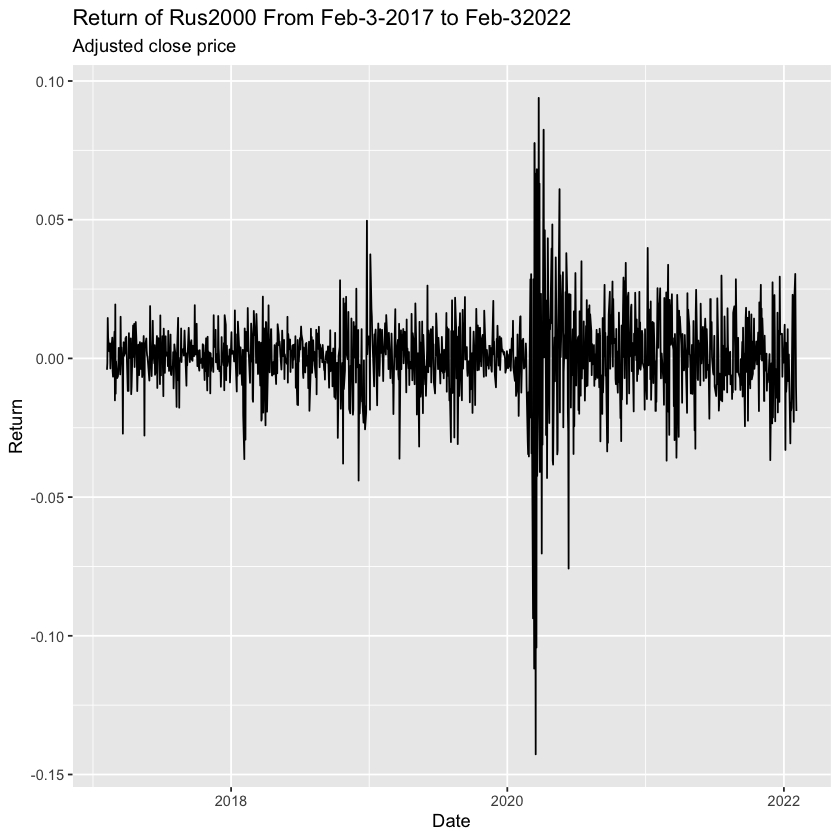

In [2]:
df = read.csv("Rus2000_daily_Feb3_2017-Feb3_2022.csv")
n = length(df$Adj.Close)
head(df)
P_t1 = df$Adj.Close[-1]
P_t0 = df$Adj.Close[-n]
R = P_t1 / P_t0 - 1
t = as.Date(df$Date,'%Y-%m-%d')
temp  = data.frame("Date" = t[-1],
                  "R" = R)

p = ggplot(data = temp,
      aes(x = Date, y = R)) + 
      labs(title = "Return of Rus2000 From Feb-3-2017 to Feb-32022",
          subtitle = "Adjusted close price")+
          xlab("Date")+
          ylab("Return") +
    geom_line()
p

During the Covid pandemic, the stock return has suffered major volatility in the early 2020.

## b

In [3]:
library(psych)
describe(R)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,1258,0.0004221921,0.01560052,0.0008414084,0.0007282658,0.01033317,-0.1427202,0.09391462,0.2366348,-0.9844468,13.37257,0.0004398442


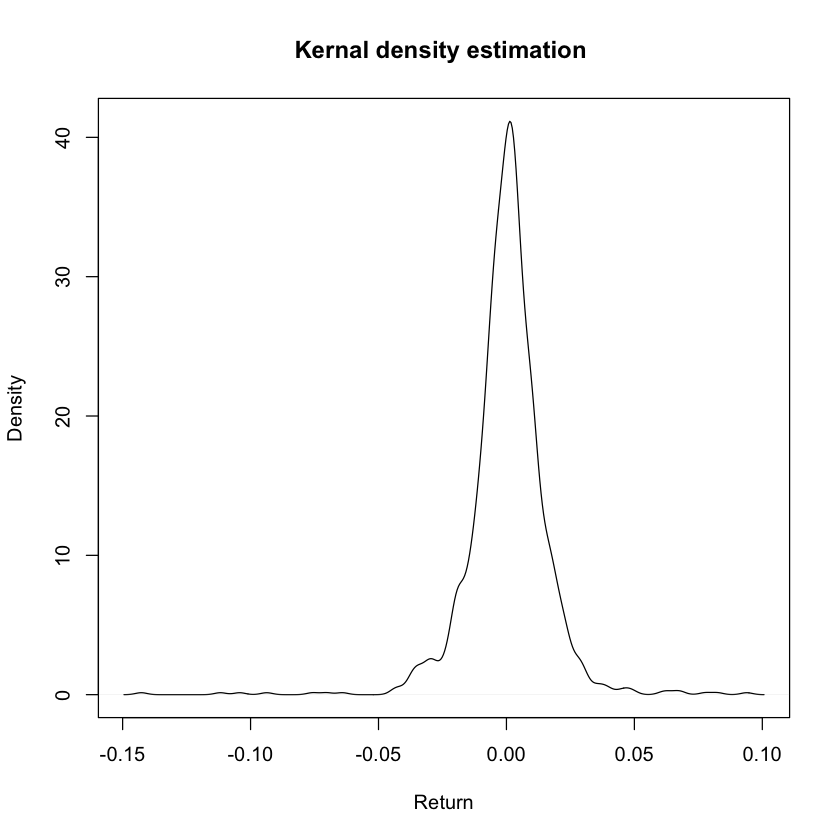

In [4]:
plot(density(R , kernel = c("gaussian")),
    xlab = "Return", ylab = "Density",
    main = "Kernal density estimation ")

The summary statistics of Return are
- mean : 0.0004221921
- sd : 0.01560052
- median: 0.0008414084
- slew: -0.9844468
- 13.37257

Observed left skewness as skewness < 0 and mass of density concentrate close to mean as kurtosis is above 10.
Overrall the Return has a high chance wavering around zero, where most of its mass is located at. 
## c

$\mathbb{P}(R_t < - Va\tilde{R}) = q = 0.05$


In [21]:
q = qnorm(.0005, mean = .0004221921, sd = .01560052)
VaR = q * 1e6 * -1 
paste("Ralative VaR for 1 million dollar =",round(VaR,3))

[1] "Ralative VaR for 1 million dollar = 50911.736"

## d


Attaching package: ‘evir’


The following objects are masked from ‘package:POT’:

    dgpd, pgpd, qgpd, rgpd


The following object is masked from ‘package:ggplot2’:

    qplot




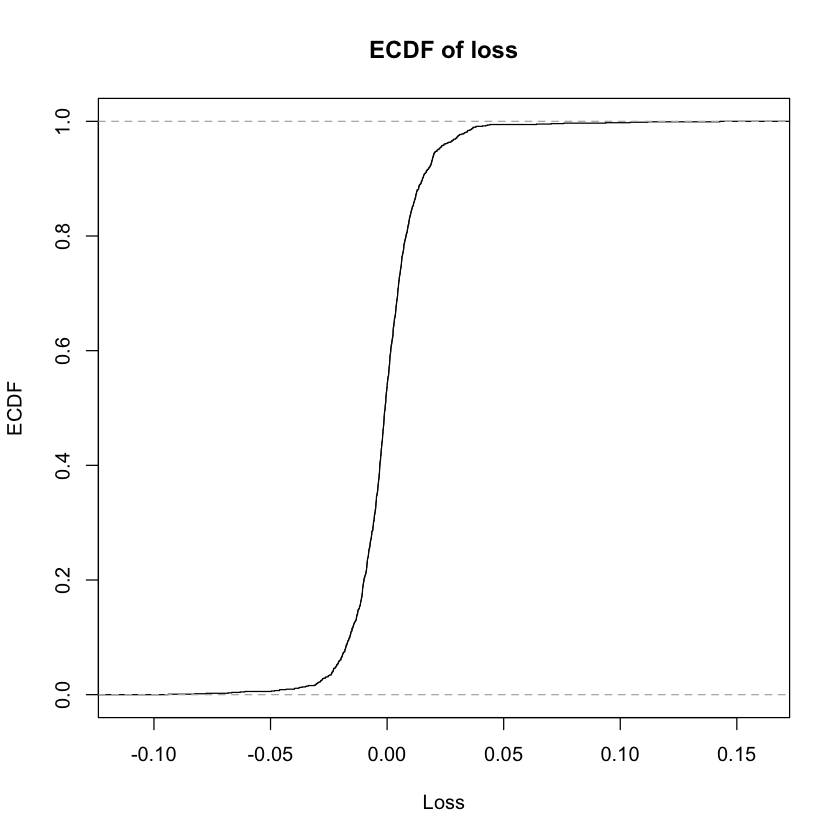

[1] "Number of data points above 0.017 threshold: 108"


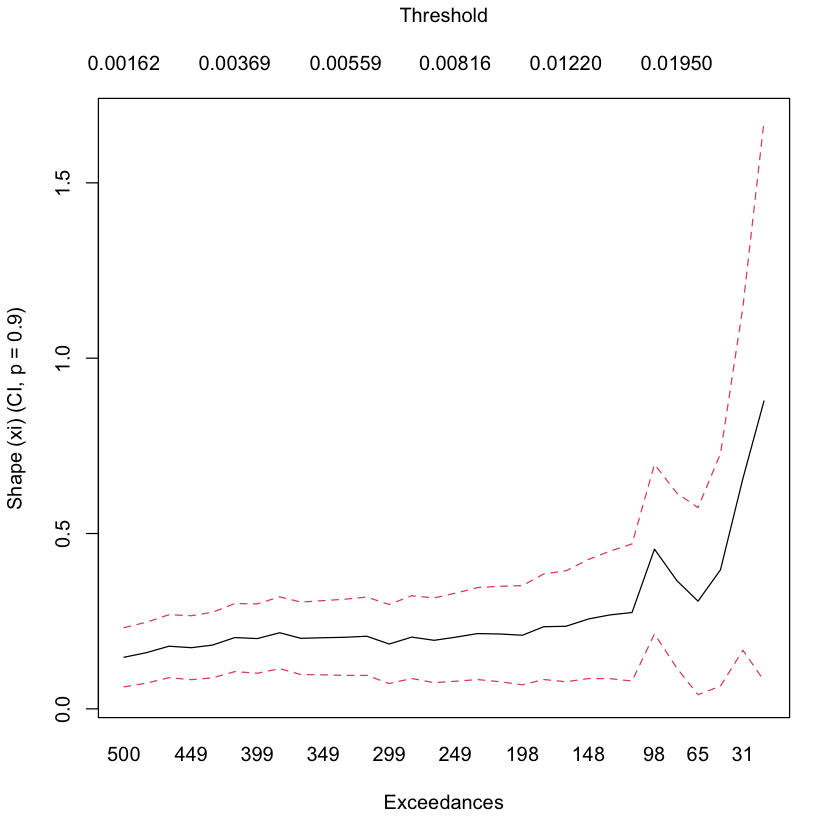

In [7]:
library(POT)
library(evir)
# Looking at the empirical cdf
loss = -1 * R
ecdf_l = ecdf(loss)
plot(ecdf_l, main = "ECDF of loss", ylab = "ECDF", xlab = "Loss")
# looking at the shape 
shape_out = shape(loss, models = 30, start = 15, end = 500, ci =.9, reverse = TRUE, auto.scale = TRUE)
# estimating for GPD parameters
gpd_out = gpd(loss, threshold = 0.017, method = c("ml"), information = c('observed'))
print(paste("Number of data points above 0.017 threshold:", length(loss[loss>0.017])))

In [8]:
# estimates of xi and beta
gpd_out$par.ests

xi       beta 
0.32941732 0.00867093

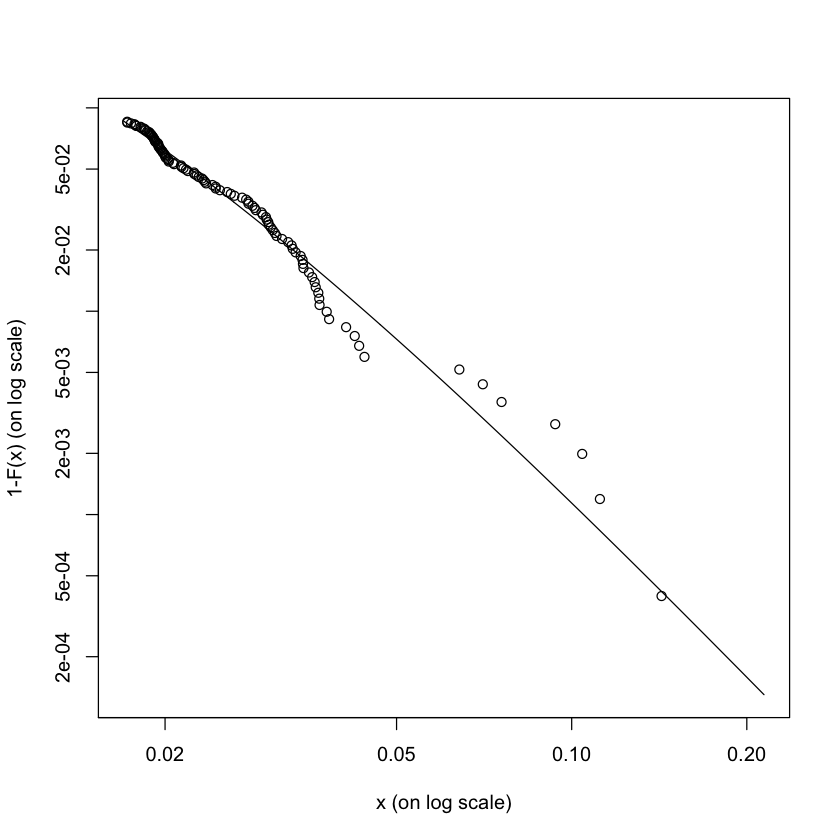

In [9]:
tail_out = tailplot(gpd_out)

We picked the threshold as 0.017, as it shows biggest numbers with low variation in shape. 

The fit isn't very ideally along the line,but it shows that the tail distribution generally fit a GPD, although there are a few outliers. The curvy nature hasn't been captured by the fitted model, because the zig-zag data points.
## e

In [18]:
m = 0.017
qt = 1-.005/(1-ecdf_l(m))
xi = gpd_out$par.ests[1]
scale = gpd_out$par.ests[2]
VaRt = qgpd(qt,xi,m,scale)
VaR = VaRt * 1e6
paste("Estimated VAR=", round(VaR,2))

[1] "Estimated VAR= 57832.44"

Estimated VAR is a little bigger comparing to previously what we calculated. This shows that the estimation could be incorrect and overestimate the VaR that we actually are concerning.

## f

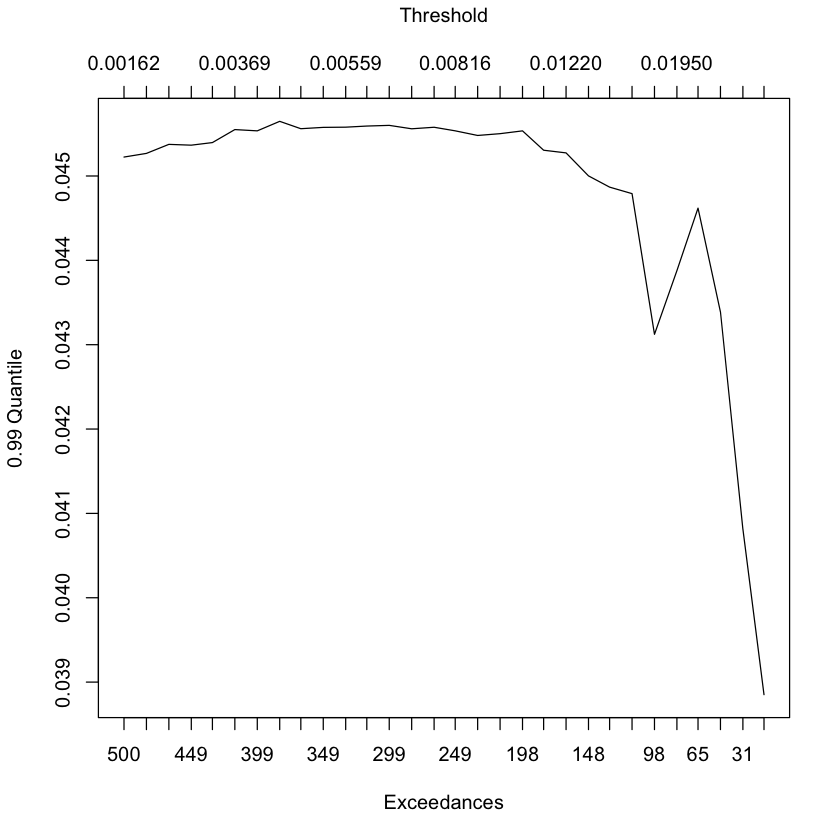

In [12]:
# gpd.q(tail_out, 0.9)

quant(loss, p =.99, models = 30, start = 15, end = 500, ci = FALSE, reverse = TRUE, auto.scale = TRUE)

The estimation of VAR is quite stable when threshold value is smaller than 0.012. But it goes wildly volativce when mu exceeds 0.012
## g

In [27]:
mu = .0004221921
sd = .01560052
q = 0.005
z = qnorm(1-q, mean = 0, sd = 1)
ES_r = mu + sd/q *exp(-z^2 / 2 )/sqrt(2 * pi)
ES = ES_r * 1e6
paste("Expected shortfall of normal disributed return is",round(ES,2))

[1] "Eexpected shortfall of normal disributed return is 45538.09"

In [33]:
mu = 0.017
xi = xi
sigma = scale
ES_r = mu + sigma * (((1-q) ^ (-xi)/(1-xi) + ((1-q)^{-xi} - 1)/xi))
ES = ES_r * 1e6
paste("Expected shortfall of GPD return is",round(ES,2))

[1] "Expected shortfall of GPD return is 29995.31"

## 2
## a

$F_Y(y) = P(X^2 < y) = P(-\sqrt{y}<X<\sqrt{y}) = \frac{\sqrt{y}}{a}, 0 \leq y \leq a^2$

$\rho = \frac{COV(X,Y)}{\sigma_x \sigma_y}$

$ E(XY) = E(X^3) = 0 = E(X)*E(Y) \Rightarrow COV(X,Y) = 0$

Therefore, by definition of Pearson correlation, they are uncorrelated.

But since there is a quadratic relation between X and Y, information of X will certainly give us information on Y. Thus, they are not independent.

## b
$\rho_s = \rho(F_X,F_y) = \rho(\frac{x+a}{2a},\frac{\sqrt{y}}{a}) = 0$

## c


In [1]:
a = 0
cov = matrix(c(1,0.9,0,0.9,1,0.9, 0,0.9,1), nrow = 3)
eigen(cov)

eigen() decomposition
$values
[1]  2.2727922  1.0000000 -0.2727922

$vectors
          [,1]          [,2]       [,3]
[1,] 0.5000000 -7.071068e-01  0.5000000
[2,] 0.7071068 -8.722736e-16 -0.7071068
[3,] 0.5000000  7.071068e-01  0.5000000


In [2]:
w = as.matrix(c(-0.5,-7,0.5))
x = t(w) %*% cov

In [3]:
solve(eigen(cov)$vectors)

0.5000000,7.071068e-01,0.5000000
-0.7071068,-9.420555e-16,0.7071068
0.5000000,-7.071068e-01,0.5000000


In [4]:
eigen(cov)$vectors

0.5000000,-7.071068e-01,0.5000000
0.7071068,-8.722736e-16,-0.7071068
0.5000000,7.071068e-01,0.5000000


Eigendecomposition gives us $Q\Lambda Q^{-1}$

This shows the inverse of Q matrix is orthogonal 

We want $w^{T}COVw < 0 \Rightarrow w^{T}Q\Lambda Q^{T}w < 0$

Let X a 1 x 3 vector  = $w^{T}Q$

From the inequalities we need $X\Lambda X^T < 0$

$\sum_{i=1}^n X_i^2 \lambda_i < 0, \lambda = (2.2727922,1.0000000,-0.2727922)$

$x1 = x2 = 0, x3 = 1 $ satisfy the condition

Because by assumption X = $w^{T}Q$

Q is orthogonal, thus $w = X^T  Q^T$

In [11]:
Q = eigen(cov)$vectors
X = as.matrix(c(0,0,1))
w = t(X) %*% t(Q)
print(w)

     [,1]       [,2] [,3]
[1,]  0.5 -0.7071068  0.5


## d

$\forall w$, we have $w^TCOVw \geq 0 \Rightarrow$ COV is a semipositivbe definite matrix,whose eigenvalues are all non-negative.

det(A) > = 0

$(a-0.62)(a-1) \leq 0 $

Thus the lower limit of a is 0.62.



In [5]:
for (i in seq(0,1,0.01)){
    print(paste(i,"the eigenvalue is"))
    print(det(matrix(c(1,0.9,i,0.9,1,0.9, i,0.9,1), nrow = 3)))
}

[1] "0 the eigenvalue is"
[1] -0.62
[1] "0.01 the eigenvalue is"
[1] -0.6039
[1] "0.02 the eigenvalue is"
[1] -0.588
[1] "0.03 the eigenvalue is"
[1] -0.5723
[1] "0.04 the eigenvalue is"
[1] -0.5568
[1] "0.05 the eigenvalue is"
[1] -0.5415
[1] "0.06 the eigenvalue is"
[1] -0.5264
[1] "0.07 the eigenvalue is"
[1] -0.5115
[1] "0.08 the eigenvalue is"
[1] -0.4968
[1] "0.09 the eigenvalue is"
[1] -0.4823
[1] "0.1 the eigenvalue is"
[1] -0.468
[1] "0.11 the eigenvalue is"
[1] -0.4539
[1] "0.12 the eigenvalue is"
[1] -0.44
[1] "0.13 the eigenvalue is"
[1] -0.4263
[1] "0.14 the eigenvalue is"
[1] -0.4128
[1] "0.15 the eigenvalue is"
[1] -0.3995
[1] "0.16 the eigenvalue is"
[1] -0.3864
[1] "0.17 the eigenvalue is"
[1] -0.3735
[1] "0.18 the eigenvalue is"
[1] -0.3608
[1] "0.19 the eigenvalue is"
[1] -0.3483
[1] "0.2 the eigenvalue is"
[1] -0.336
[1] "0.21 the eigenvalue is"
[1] -0.3239
[1] "0.22 the eigenvalue is"
[1] -0.312
[1] "0.23 the eigenvalue is"
[1] -0.3003
[1] "0.24 the eigenvalue is"


In [ ]:
"[;p;]"